In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# load the data set
df = pd.read_csv("crop.csv")

# display the first five rows of the data set
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [4]:
# preprocessing 
# check for null value
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [5]:
# check for wrong format
print(df.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [6]:
# Exploratory Data Analysis (EDA)
# summary statistics
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [7]:
# Data Preprocessing
# for machine learning
# correlation
c = df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target'] = c.cat.codes

y = df.target
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

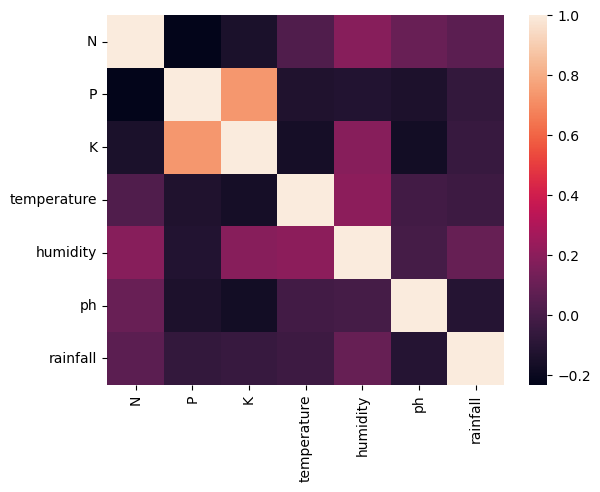

In [9]:
# correlation visualization
import seaborn as sns

sns.heatmap(X.corr())
plt.show()


In [11]:
# Machine Learning Models, set train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Scaler = MinMaxScaler()
X_train_scaled = Scaler.fit_transform(X_train)

# apply the scaling to the test set as well so that we compute for the training set
X_test_scaled = Scaler.transform(X_test)

In [12]:
# selection of module, KNN, confusion matrix, random forest, classification like SVM, decision tree
# predict using KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.975

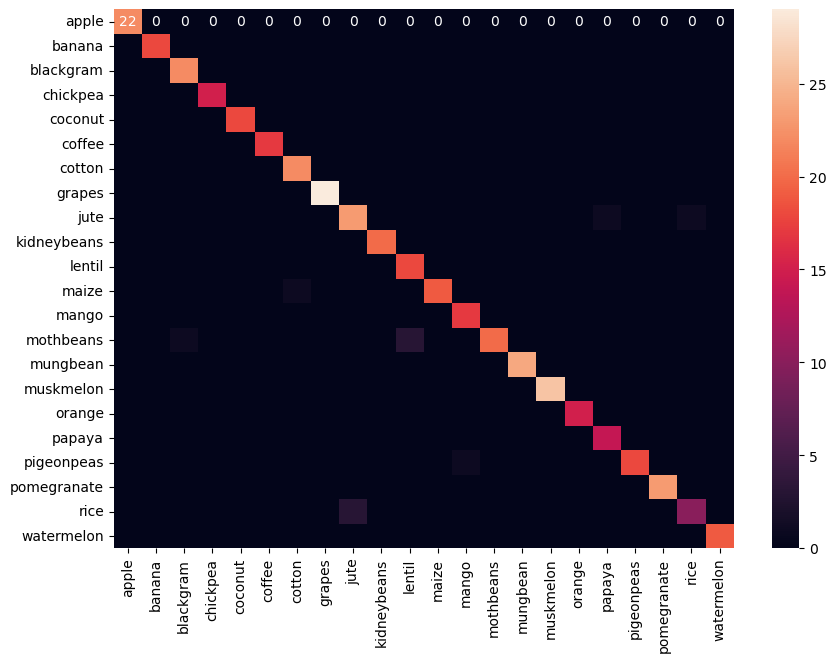

In [15]:
# try confusion matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, index=[i for i in targets.values()],
                     columns=[i for i in targets.values()])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

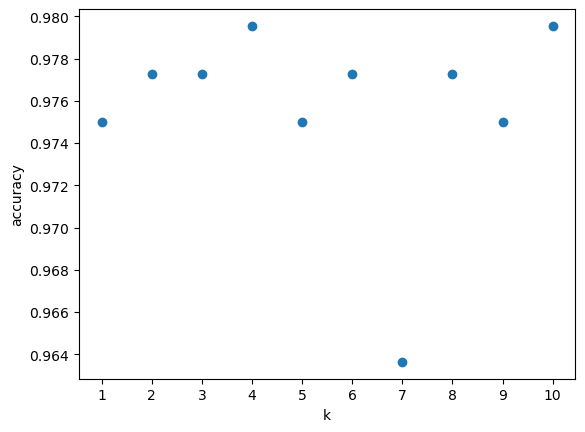

In [16]:
k_range = range(1,11)
scores = []
for k in  k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([i for i in range(1,11)])
plt.show()


In [19]:
# classification using support vector Classifier
from sklearn.svm import SVC

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train_scaled, y_train)
svc_linear.score(X_test_scaled, y_test)
print('Linear Kernel Accuracy:' , svc_linear.score(X_test_scaled, y_test))

svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train_scaled, y_train)
svc_poly.score(X_test_scaled, y_test)
print('Poly Kernel Accuracy:' , svc_poly.score(X_test_scaled, y_test))

svc_poly = SVC(kernel='rbf')
svc_poly.fit(X_train_scaled, y_train)
svc_poly.score(X_test_scaled, y_test)
print('RBF Kernel Accuracy:' , svc_poly.score(X_test_scaled, y_test))

Linear Kernel Accuracy: 0.9704545454545455
Poly Kernel Accuracy: 0.9886363636363636
RBF Kernel Accuracy: 0.9840909090909091


In [ ]:
# Highlights 
# 1 . Poly kernel has a small accuracy score than the RBF 

In [21]:
# Classification using decision tree
from sklearn.tree import  DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
dt.score(X_test_scaled, y_test)

0.9954545454545455

In [22]:
# Classification using random forest
from sklearn.ensemble import  RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)


0.9977272727272727

In [ ]:
# Machine Learning
# split data into three categories
# namely : numerical, categorical, and ordinal

# Numerical data : are numbers that can be splitted into numerical categories

In [25]:
# Linear Regression
# Regression is when you try to find a relationship between variables.
x = [5,15,25,35,45,55]
y = [15,25,35,45,55,65]


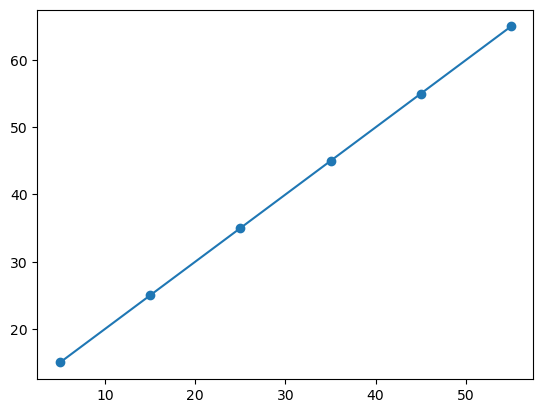

In [27]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(x,y)

def myfun(x):
    return slope * x + intercept

myModel = list(map(myfun, x))
plt.scatter(x,y)
plt.plot(x, myModel)
plt.show()


In [34]:
# Exercise plot Polynomial Regression
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]


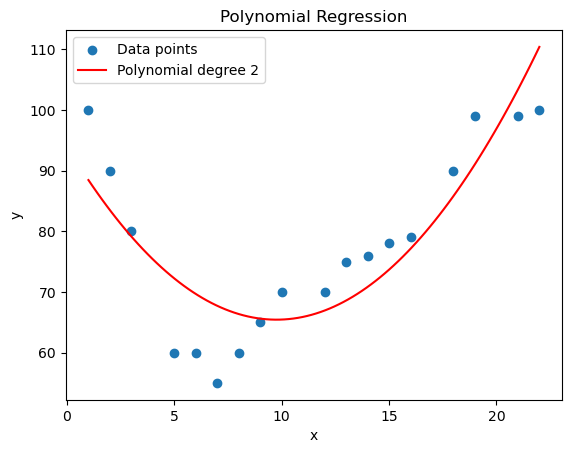

In [35]:
from numpy.polynomial.polynomial import Polynomial
# Fit a polynomial of degree 2 (quadratic polynomial)
degree = 2
coefficients = np.polyfit(x, y, degree)

# Create the polynomial function
polynomial = np.poly1d(coefficients)

# Generate y-values based on the polynomial
x_fit = np.linspace(min(x), max(x), 100)
y_fit = polynomial(x_fit)

# Plot the original data points
plt.scatter(x, y, label='Data points')

# Plot the polynomial regression model
plt.plot(x_fit, y_fit, color='red', label=f'Polynomial degree {degree}')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()


plt.show()

In [ ]:
# Scaling